In [1]:
from scopesim_templates.misc import point_source
import scopesim as sim
from scopesim_templates.extragalactic import elliptical, spiral_two_component
import matplotlib.pyplot as plt
from scopesim_templates import star_field, stars
import numpy as np
from scopesim_templates.calibration import empty_sky
from astropy.io import fits
import scipy as sp
from scopesim.effects import SeeingPSF

In [2]:
local_package_folder = "../inst_pkgs"
sim.rc.__config__["!SIM.file.local_packages_path"] = local_package_folder
#packages = [ "MICADO_Sci", "MAORY"]
#sim.download_packages(packages, release = "stable") 

In [3]:


#Necessary so ScopeSim knows where we put the packages we want to use:
local_package_folder = "..\inst_pkgs"
sim.rc.__config__["!SIM.file.local_packages_path"] = local_package_folder

#Generate sources
nova1 = point_source(sed="sne/sn1a", amplitude=16, filter_curve="H", x = 0, y=0)
nova2 = point_source(sed="sne/sn1a", amplitude=17, filter_curve="H", x = 1, y=1.2)

source = nova1 + nova2

#Specify simulation conditions
cmds = sim.UserCommands(
            use_instrument="MICADO",
            set_modes=["SCAO","IMG_4mas"],  
            properties={
                "!OBS.dit": 1000,
            }
        )

#Run simulation
micado = sim.OpticalTrain(cmds)

micado.observe(source)

hdus = micado.readout(filename=f"testRun.fits")

 Image Plane effects: 100%|██████████| 1/1 [00:00<?, ?it/s]

astar.scopesim.detector.detector_array - Extracting from 1 detectors...


In [11]:
novaspec = nova1.spectra[0]
novaspec.get_magnitude(filter_curve='H')

<Magnitude 16. mag(AB)>

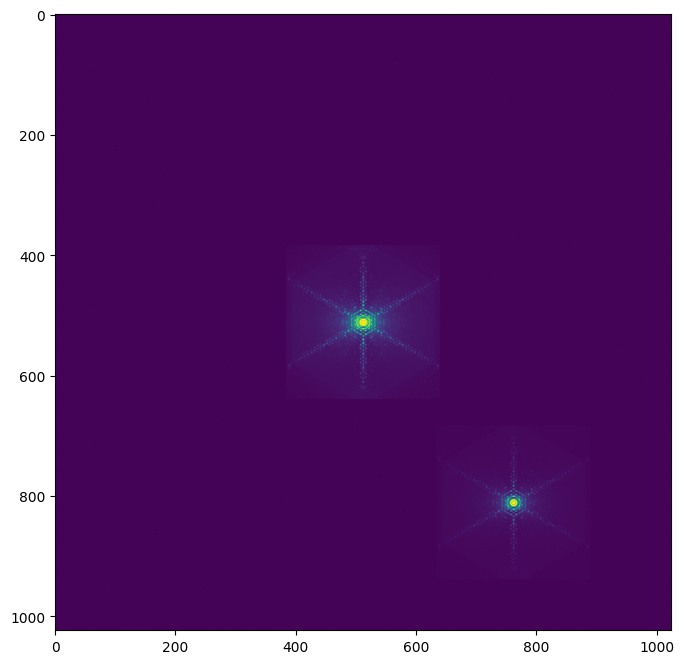

In [35]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,8))
plt.imshow(hdus[0][1].data)
plt.show()

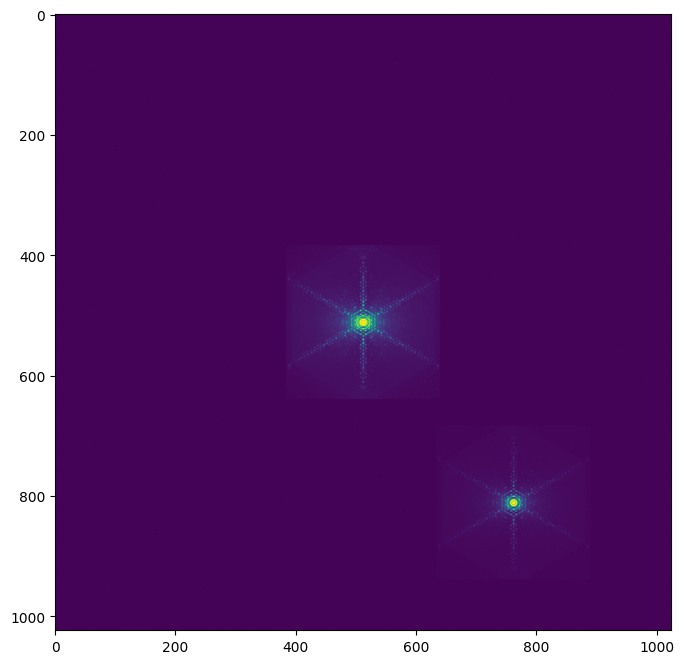

In [36]:
from astropy.io import fits

with fits.open(f'testRun.fits') as file:
  image = file[1].data.copy()
  file.close()

plt.figure(figsize=(8,8))
plt.imshow(image)
plt.show()

In [41]:
from scopesim_templates.stellar import cluster

In [42]:
cluster1 = cluster(mass=1000,         # Msun
                             distance=50000,    # parsec
                             core_radius=0.3,   # parsec
                             seed=68770)

imf - sample_imf: Setting maximum allowed mass to 1000
imf - sample_imf: Loop 0 added 9.68e+02 Msun to previous total of 0.00e+00 Msun
imf - sample_imf: Loop 1 added 7.72e+01 Msun to previous total of 9.68e+02 Msun


In [43]:
source = cluster1
file_name = f'cluster1test_espt1000'
#Specify simulation conditions
cmds = sim.UserCommands(
            use_instrument="MICADO",
            set_modes=["SCAO","IMG_4mas"],  
            properties={
                "!OBS.dit": 1000,
            }
        )

#Run simulation
micado = sim.OpticalTrain(cmds)

micado.observe(source)

hdus = micado.readout(filename=f"../fitsOutput/{file_name}.fits")

 Image Plane effects: 100%|██████████| 1/1 [00:00<?, ?it/s]

astar.scopesim.detector.detector_array - Extracting from 1 detectors...


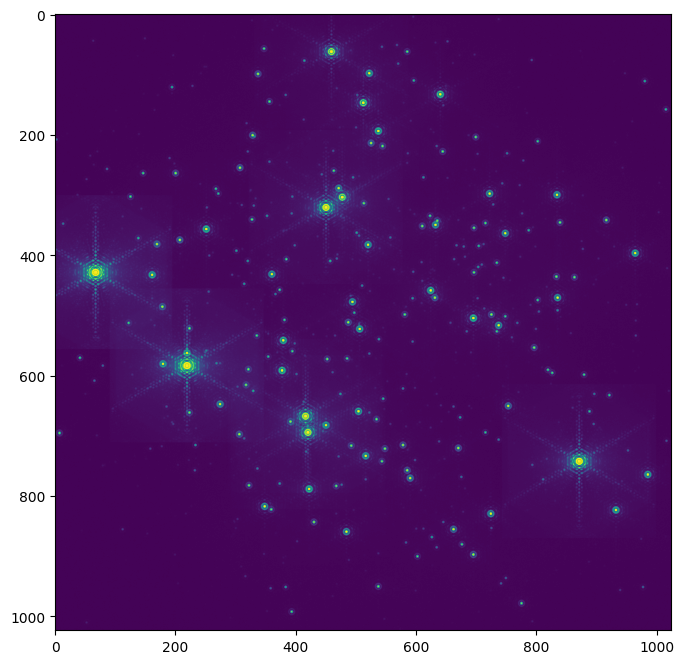

In [44]:
plt.figure(figsize=(8,8))
plt.imshow(hdus[0][1].data)
plt.show()

In [45]:
nova3 = point_source(sed="sne/sn1a", amplitude=16, filter_curve="H", x = 0, y=0)

In [47]:
starfield = star_field(5,mmin=17,mmax=22,filter_name="Ks", width=3, height=1)

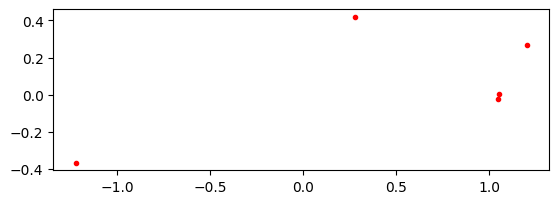

In [48]:
starfield.plot()

In [49]:
starfield.fields[0]

x,y,ref,weight,spec_types
arcsec,arcsec,,,
float64,float64,int32,float64,str3
-1.2233891144049522,-0.3669974118661875,0,1.584893192461111e-07,A0V
1.0519558884197382,0.0020959871192997026,0,5.0118723362727144e-08,A0V
1.20225036589003,0.2679656209164357,0,1.584893192461111e-08,A0V
0.28083956619242045,0.42047035921697173,0,5.011872336272715e-09,A0V
1.0462589573080638,-0.024551310813973326,0,1.584893192461111e-09,A0V


In [50]:
source = starfield
file_name = f'starfieldtest_espt1000'
#Specify simulation conditions
cmds = sim.UserCommands(
            use_instrument="MICADO",
            set_modes=["SCAO","IMG_4mas"],  
            properties={
                "!OBS.dit": 1000,
            }
        )

#Run simulation
micado = sim.OpticalTrain(cmds)

micado.observe(source)

hdus = micado.readout(filename=f"../fitsOutput/{file_name}.fits")

 Image Plane effects: 100%|██████████| 1/1 [00:00<?, ?it/s]

astar.scopesim.detector.detector_array - Extracting from 1 detectors...


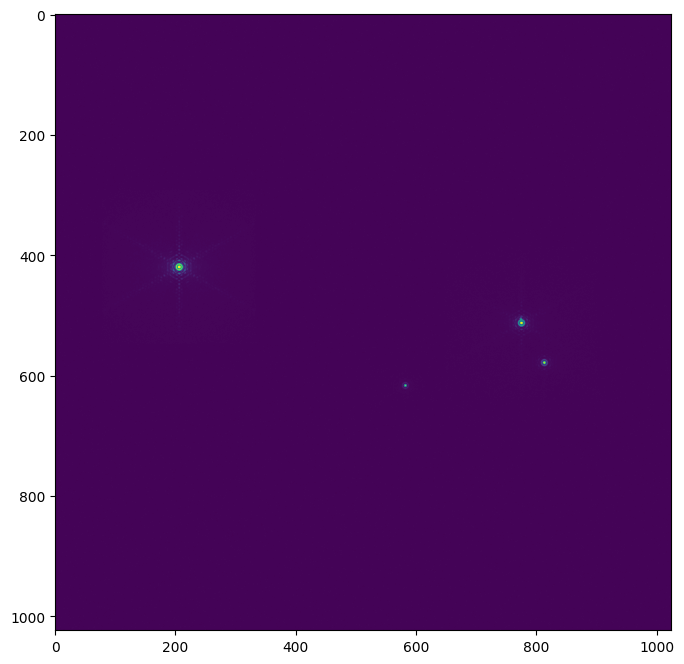

In [51]:
plt.figure(figsize=(8,8))
plt.imshow(hdus[0][1].data)
plt.show()

In [52]:
from scopesim_templates.stellar import star 

In [53]:
star1 = star(filter_name="Ks", amplitude=15, spec_type="M0V", x=1, y=0)

In [54]:
import pyckles as p
library = p.SpectralLibrary("pickles")
speclist = list(library.available_spectra)
print(speclist)

['A0I', 'A0III', 'A0IV', 'A0V', 'A2I', 'A2V', 'A3III', 'A3V', 'A4IV', 'A5III', 'A5V', 'A7III', 'A7V', 'B0I', 'B0V', 'B1III', 'B1I', 'B1V', 'B2II', 'B2IV', 'B3I', 'B3III', 'B3V', 'B5V', 'B5I', 'B5II', 'B5III', 'B6IV', 'B8I', 'B8V', 'B9III', 'B9V', 'F0IV', 'F0I', 'F0II', 'F0III', 'F0V', 'F2II', 'F2III', 'F2V', 'F5I', 'F5III', 'F5IV', 'F5V', 'F6V', 'F8I', 'F8IV', 'F8V', 'G0I', 'G0III', 'G0IV', 'G0V', 'G2I', 'G2IV', 'G2V', 'G5I', 'G5II', 'G5III', 'G5IV', 'G5V', 'G8I', 'G8III', 'G8IV', 'G8V', 'K0II', 'K0III', 'K0IV', 'K0V', 'K1III', 'K1IV', 'K2I', 'K2III', 'K2V', 'K3II', 'K3I', 'K3III', 'K3IV', 'K3V', 'K4I', 'K4III', 'K4V', 'K5III', 'K5V', 'K7V', 'M0III', 'M0V', 'M10III', 'M1III', 'M1V', 'M25V   ', 'M2I', 'M2III', 'M2V', 'M3II', 'M3III', 'M3V', 'M4III', 'M4V', 'M5III', 'M5V', 'M6III', 'M6V', 'M7III', 'M8III', 'M9III', 'O5V', 'O8III', 'O9V', 'F6V_R  ', 'F8V_R  ', 'G0V_R  ', 'G5III_R', 'G5V_R  ', 'K0III_R', 'K0V_R  ', 'K1III_R', 'K2III_R', 'K3III_R', 'K4III_R', 'K5III_R', 'F5V_W  ', 'F8V_W  '

In [55]:
from scopesim_templates.stellar import stars

In [56]:
starset1 = stars(filter_name="Ks", amplitudes = [18, 19, 20], spec_types= ["A0V", "G2V", "K0III"] , x=[-1,0,1], y=[0]*3)


In [57]:
source = starset1
file_name = f'starset1test3stars_espt1000'
#Specify simulation conditions
cmds = sim.UserCommands(
            use_instrument="MICADO",
            set_modes=["SCAO","IMG_4mas"],  
            properties={
                "!OBS.dit": 1000,
            }
        )

#Run simulation
micado = sim.OpticalTrain(cmds)

micado.observe(source)

hdus = micado.readout(filename=f"../fitsOutput/{file_name}.fits")

 Image Plane effects: 100%|██████████| 1/1 [00:00<?, ?it/s]

astar.scopesim.detector.detector_array - Extracting from 1 detectors...


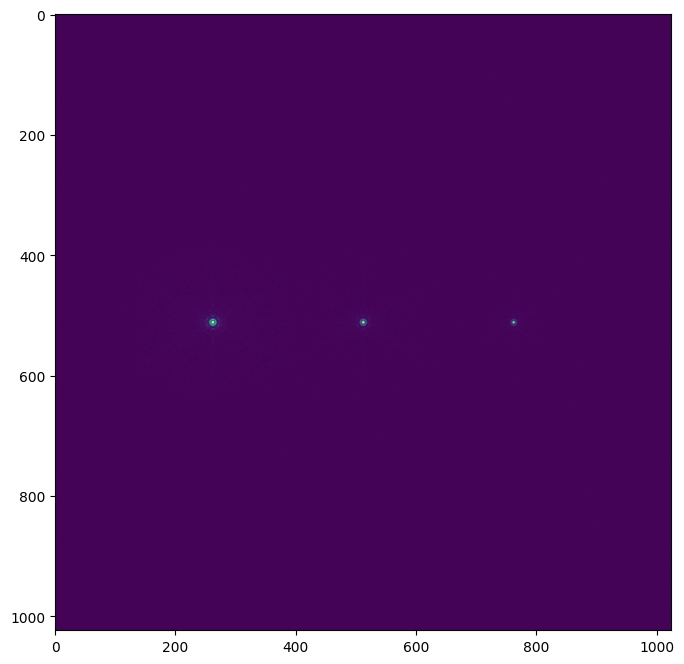

In [58]:
plt.figure(figsize=(8,8))
plt.imshow(hdus[0][1].data)
plt.show()

In [59]:
source.fields[0]

x,y,ref,weight,spec_types
arcsec,arcsec,,,
float64,float64,int32,float64,str5
-1.0,0.0,0,6.30957344480193e-08,A0V
0.0,0.0,1,2.511886431509577e-08,G2V
1.0,0.0,2,1e-08,K0III


In [11]:
starfield2 = star_field(n=30,mmin=17,mmax=22,width=1,height=.5,filter_name="Ks")
nova1 = point_source(sed="sne/sn1a", amplitude=15, filter_curve="Ks",   x = 1.8, y=-1)
galellip2 = elliptical(r_eff=3,pixel_scale=0.004,filter_name="Ks",amplitude=14)
starset2 = stars(filter_name="Ks",amplitudes=[17,18,19,20,21], spec_types="A0V", x=[-1,-.7,-.4,-.1,.2],y=[-1.5]*5)

In [12]:
source = starfield2 + nova1 + galellip2 + starset2 

In [13]:

file_name = f'combotest_espt1000'
#Specify simulation conditions
cmds = sim.UserCommands(
            use_instrument="MICADO",
            set_modes=["SCAO","IMG_4mas"],  
            properties={
                "!OBS.dit": 1000,
            }
        )

#Run simulation
micado = sim.OpticalTrain(cmds)

micado.observe(source)

hdus = micado.readout(filename=f"../fitsOutput/{file_name}.fits")

 Image Plane effects: 100%|██████████| 1/1 [00:00<?, ?it/s]

astar.scopesim.detector.detector_array - Extracting from 1 detectors...


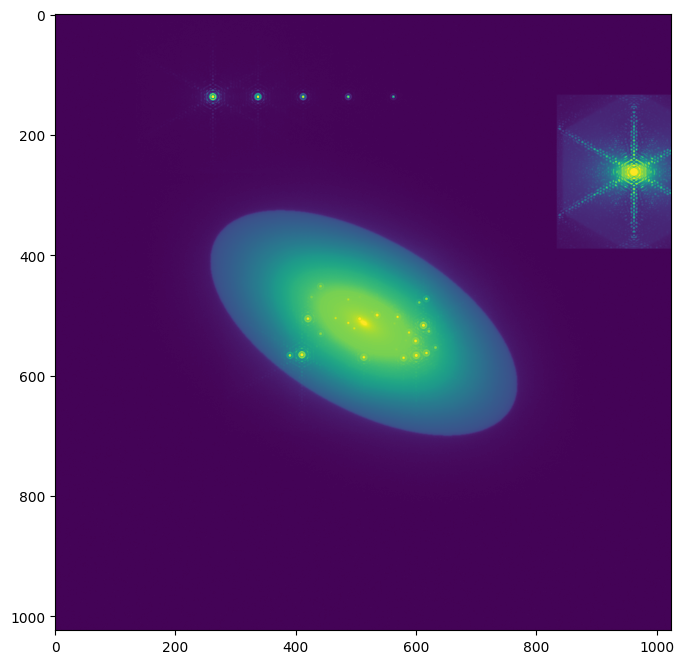

In [14]:
plt.figure(figsize=(8,8))
plt.imshow(hdus[0][1].data)
plt.show()

          x                     y           ... spec_types
        arcsec                arcsec        ...           
--------------------- --------------------- ... ----------
  -0.4077963714683174   0.21474730629858096 ...        A0V
   0.3506519628065794   0.22143027323075265 ...        A0V
  0.40075012196334336  0.018688857584641283 ...        A0V
  0.09361318873080682 -0.047529755752080016 ...        A0V
  0.34875298576935465   0.12460238191864748 ...        A0V
  -0.3669974118661875 -0.024030961692535657 ...        A0V
0.0020959871192997026   0.23370486937013352 ...        A0V
   0.2679656209164357    0.2356021736155326 ...        A0V
  0.42047035921697173   0.20522675267435597 ...        A0V
-0.024551310813973326 -0.025773438273463345 ...        A0V
                  ...                   ... ...        ...
  0.47917339996679564    0.1682497315252468 ...        A0V
  -0.2829447881606568   0.07648768917139731 ...        A0V
  0.37245438750232207   -0.1315298242379186 ...        A

 Image Plane effects: 100%|██████████| 1/1 [00:00<?, ?it/s]

astar.scopesim.detector.detector_array - Extracting from 1 detectors...


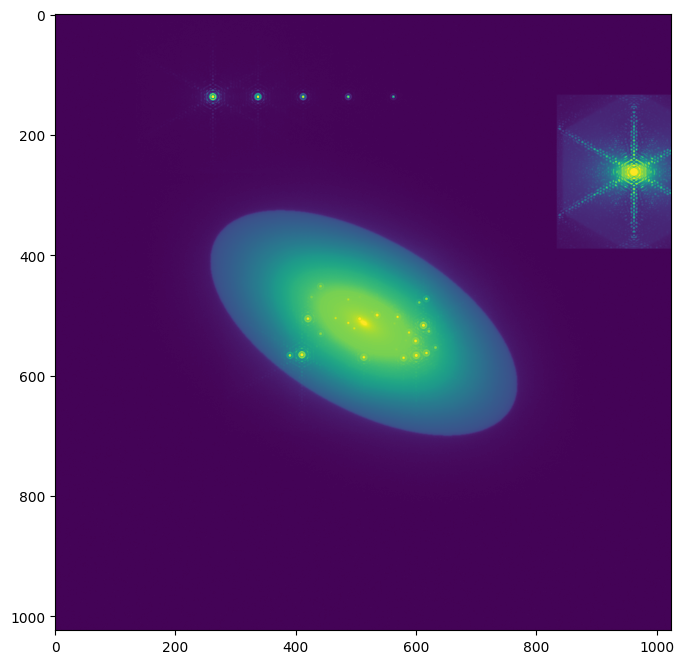

In [5]:
#import the necessary functions and packages
from scopesim_templates.stellar import star_field
from scopesim_templates.misc import point_source
import scopesim as sim
from scopesim_templates.extragalactic import elliptical
from scopesim_templates.stellar import stars
import matplotlib.pyplot as plt
from astropy.io import fits

#direct scopesim to the downloaded packages
local_package_folder = "../inst_pkgs"
sim.rc.__config__["!SIM.file.local_packages_path"] = local_package_folder

#generate multiple sources
starfield2 = star_field(n=30,mmin=17,mmax=22,width=1,height=.5,filter_name="Ks")
nova1 = point_source(sed="sne/sn1a", amplitude=15, filter_curve="Ks",   x = 1.8, y=-1)
galellip2 = elliptical(r_eff=3,pixel_scale=0.004,filter_name="Ks",amplitude=14)
starset2 = stars(filter_name="Ks",amplitudes=[17,18,19,20,21], spec_types="A0V", x=[-1,-.7,-.4,-.1,.2],y=[-1.5]*5)

#set the source to the sum of the generated sources
source = starfield2 + nova1 + galellip2 + starset2 

#Specify simulation conditions
cmds = sim.UserCommands(
            use_instrument="MICADO",
            set_modes=["SCAO","IMG_4mas"],  
            properties={
                "!OBS.dit": 1000,
            }
        )

#Run simulation
micado = sim.OpticalTrain(cmds)
micado.observe(source)
hdus = micado.readout(filename=f"combo.fits")

#plot the result
plt.figure(figsize=(8,8))
plt.imshow(hdus[0][1].data)
plt.show()

In [7]:
galellip3 = elliptical(r_eff=2,pixel_scale=0.004,filter_name="Ks",amplitude=14)

In [14]:
spiralgal = spiral_two_component(extent=1)

Text(0.5, 1.0, 'Spiral Galaxy')

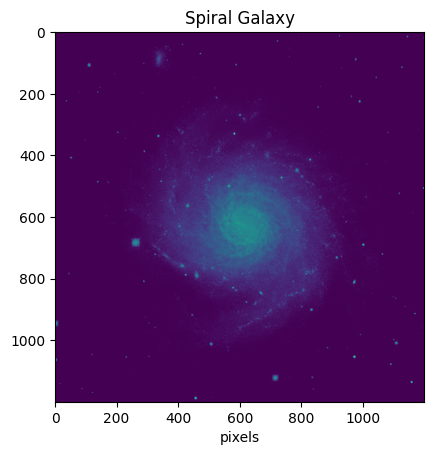

In [23]:
#plt.imshow(np.log10(spiralgal.fields[0].data))
plt.imshow(spiralgal.fields[0].data)
plt.xlabel("pixels")
plt.title("Spiral Galaxy")

imf - sample_imf: Setting maximum allowed mass to 100000
imf - sample_imf: Loop 0 added 1.07e+05 Msun to previous total of 0.00e+00 Msun


 Image Plane effects: 100%|██████████| 1/1 [00:00<?, ?it/s]

astar.scopesim.detector.detector_array - Extracting from 1 detectors...


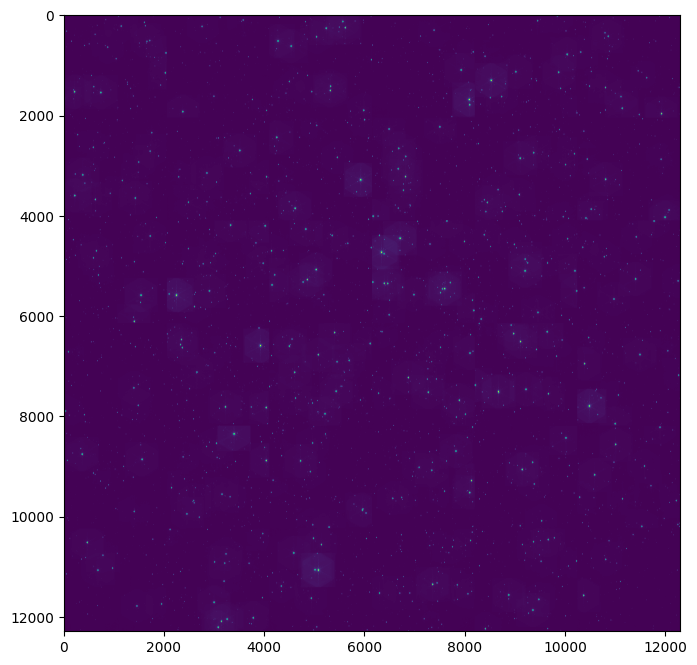

In [81]:
from scopesim_templates.stellar import cluster
import scopesim as sim
import matplotlib.pyplot as plt
from astropy.io import fits

#direct scopesim to the downloaded packages
local_package_folder = "../inst_pkgs" #use whatever path leads to inst_pkgs folder
sim.rc.__config__["!SIM.file.local_packages_path"] = local_package_folder

#generate source
cluster1 = cluster(mass=100000, distance=50000, core_radius=3, seed=68770)
source = cluster1

#Specify simulation conditions
cmds = sim.UserCommands(use_instrument="MICADO",
                        set_modes=["MCAO","IMG_1.5mas"],        #using "MCAO" and "IMG_1.5mas" instead of "SCAO" and "IMG_4mas"
                        properties={"!OBS.dit": 1000,
                                "!DET.width": 12288,            #the correct detector height and width for MICADO
                                "!DET.height": 12288,           #default values of height and width are 1024
                                "!OBS.airmass": 1.3,
                                "!OBS.filter_name_fw1": "open", #set one filter wheel to "open"
                                "!OBS.filter_name_fw2": "Ks",   #the Ks filter is in filter wheel 2
                                "!ATMO.humidity" : .12,         #relative humidity 
                                "!ATMO.temperature" : 8         #degrees in celsius 
                                })

#Run simulation
micado = sim.OpticalTrain(cmds)
micado.observe(source)
hdus = micado.readout(filename=f"combo.fits")

#plot the result
plt.figure(figsize=(8,8))
plt.imshow(hdus[0][1].data)
plt.show()

Text(0.5, 1.0, 'Star Cluser mass = 100000M$_\\odot$, Distance = 50000pc')

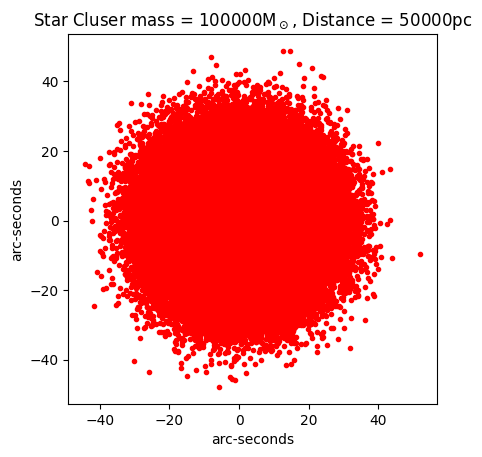

In [82]:
source.plot()
plt.xlabel("arc-seconds")
plt.ylabel("arc-seconds")
plt.title(r'Star Cluser mass = 100000M$_\odot$, Distance = 50000pc')


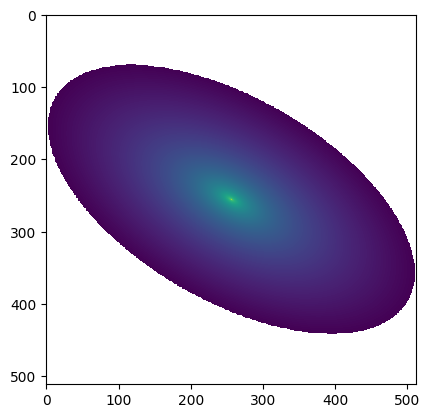

In [3]:
import matplotlib.pyplot as plt
from scopesim_templates.extragalactic import elliptical
import scopesim as sim
import numpy as np

local_package_folder = "../inst_pkgs"
sim.rc.__config__["!SIM.file.local_packages_path"] = local_package_folder

galellip2 = elliptical(r_eff=3,pixel_scale=0.004,filter_name="Ks",amplitude=14)

source = galellip2

plt.imshow(np.log10(source.fields[0].data))

In [3]:
from scopesim_templates.stellar import stars
import matplotlib.pyplot as plt
import scopesim as sim
import numpy as np

local_package_folder = "../inst_pkgs"
sim.rc.__config__["!SIM.file.local_packages_path"] = local_package_folder

starset3 = stars(filter_name="Ks", amplitudes = [18]*6, spec_types= ["A0V", "G2V", "K0III"] *2, x=np.linspace(-1,1,6), y=np.linspace(-1,1,6))

source = starset3

In [4]:
print(source.fields)

[<Table length=6>
         x                    y            ref         weight        spec_types
       arcsec               arcsec                                             
      float64              float64        int32       float64           str5   
-------------------- -------------------- ----- -------------------- ----------
                -1.0                 -1.0     0 6.30957344480193e-08        A0V
                -0.6                 -0.6     1 6.30957344480193e-08        G2V
-0.19999999999999996 -0.19999999999999996     2 6.30957344480193e-08      K0III
 0.20000000000000018  0.20000000000000018     0 6.30957344480193e-08        A0V
  0.6000000000000001   0.6000000000000001     1 6.30957344480193e-08        G2V
                 1.0                  1.0     2 6.30957344480193e-08      K0III]


Text(0.5, 1.0, 'A0V Spectrum')

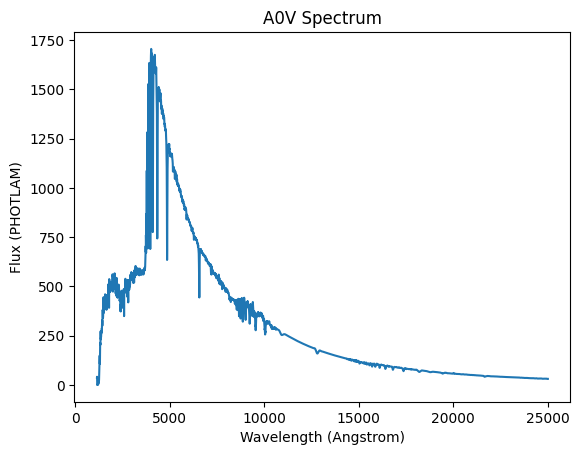

In [9]:
source.spectra[0].plot()
plt.title("A0V Spectrum")

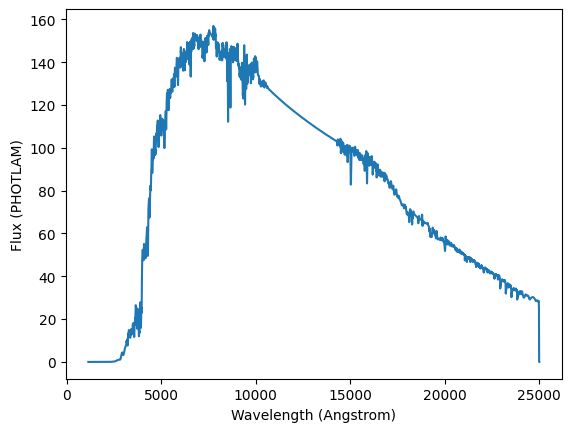

In [11]:
source.spectra[2].plot()


In [3]:
def makeFits(sed="sne/sn1a", amp=18, filt_cur="Ks", xcoord=0, ycoord=0, exposure_time=1000, fov="IMG_4mas", AOsystem="SCAO", airmass=1.2, fw1="open", fw2="Ks", humidity=0.1, temp=7, pressure=0.755):
    argnames = ["sed", "amp", "filt_cur", "xcoord", "ycoord", "exposure_time", "fov", "AOsystem", "airmass", "fw1", "fw2", "humidity", "temp", "pressure"]
    defaults = ["sne/sn1a", 18, "Ks", 0, 0, 1000, "IMG_4mas", "SCAO", 1.2, "open", "Ks", 0.1, 7, 0.755]
    vals = [sed, amp, filt_cur, xcoord, ycoord, exposure_time, fov, AOsystem, airmass, fw1, fw2, humidity, temp, pressure]
    checkvalsindex = [0, 3, 4, 8, 9, 10, 11, 12, 13] # index values of args that would be appended to file name if they differ from defaults 

    source = point_source(sed, amp, filt_cur, xcoord, ycoord) #generate a point source
    file_name = f"point{amp}_{filt_cur}_{fov}_{AOsystem}_et{exposure_time}" #build a file name according to observation params

    for x in checkvalsindex:
        if vals[x] != defaults[x]:
            file_name += f"_{argnames[x]}_{vals[x]}" #add these arg values to the name of the fits file if they are not equal to default values
           
    emptysky = empty_sky() #generate an empty sky source
    sky_file_name = file_name + f"_sky" #the empty sky file has the same name as the point source observation, with "_sky" appended
    
    cmds = sim.UserCommands(use_instrument="MICADO",
                    set_modes=[AOsystem,fov],  
                    properties={"!OBS.dit": exposure_time,
                                "!OBS.airmass": airmass,
                                "!OBS.filter_name_fw1": fw1,
                                "!OBS.filter_name_fw2": fw2,
                                "!ATMO.humidity" : humidity,
                                "!ATMO.temperature" : temp,
                                "!ATMO.pressure" : pressure
                                })
    micado = sim.OpticalTrain(cmds) #observe the point source and save to fits
    micado.observe(source)
    hdus = micado.readout(filename=f"../fitsOutput/{file_name}.fits") #save the observation data to a file in the folder fitsOutput

    micado.observe(emptysky) #observe the empty sky and save to fits
    hdussky = micado.readout(filename=f"../fitsOutput/{sky_file_name}.fits")

    return file_name

In [8]:
filenames = []
magnitudes = [17,18,19,20,21,22,23]

for m in magnitudes:
    filenames.append(makeFits(amp=m,filt_cur="J",AOsystem="MCAO",fw1="J",fw2="open"))

print(filenames)




 Image Plane effects: 100%|██████████| 1/1 [00:00<?, ?it/s]

astar.scopesim.detector.detector_array - Extracting from 1 detectors...



 Image Plane effects: 100%|██████████| 1/1 [00:00<?, ?it/s]

astar.scopesim.detector.detector_array - Extracting from 1 detectors...



 Image Plane effects: 100%|██████████| 1/1 [00:00<?, ?it/s]

astar.scopesim.detector.detector_array - Extracting from 1 detectors...



 Image Plane effects: 100%|██████████| 1/1 [00:00<?, ?it/s]

astar.scopesim.detector.detector_array - Extracting from 1 detectors...



 Image Plane effects: 100%|██████████| 1/1 [00:00<?, ?it/s]

astar.scopesim.detector.detector_array - Extracting from 1 detectors...



 Image Plane effects: 100%|██████████| 1/1 [00:00<?, ?it/s]

astar.scopesim.detector.detector_array - Extracting from 1 detectors...



 Image Plane effects: 100%|██████████| 1/1 [00:00<?, ?it/s]

astar.scopesim.detector.detector_array - Extracting from 1 detectors...



 Image Plane effects: 100%|██████████| 1/1 [00:00<?, ?it/s]

astar.scopesim.detector.detector_array - Extracting from 1 detectors...



 Image Plane effects: 100%|██████████| 1/1 [00:00<?, ?it/s]

astar.scopesim.detector.detector_array - Extracting from 1 detectors...



 Image Plane effects: 100%|██████████| 1/1 [00:00<?, ?it/s]

astar.scopesim.detector.detector_array - Extracting from 1 detectors...



 Image Plane effects: 100%|██████████| 1/1 [00:00<?, ?it/s]

astar.scopesim.detector.detector_array - Extracting from 1 detectors...



 Image Plane effects: 100%|██████████| 1/1 [00:00<?, ?it/s]

astar.scopesim.detector.detector_array - Extracting from 1 detectors...



 Image Plane effects: 100%|██████████| 1/1 [00:00<?, ?it/s]

astar.scopesim.detector.detector_array - Extracting from 1 detectors...



 Image Plane effects: 100%|██████████| 1/1 [00:00<?, ?it/s]

astar.scopesim.detector.detector_array - Extracting from 1 detectors...


['point17_J_IMG_4mas_MCAO_et1000_fw1_J_fw2_open', 'point18_J_IMG_4mas_MCAO_et1000_fw1_J_fw2_open', 'point19_J_IMG_4mas_MCAO_et1000_fw1_J_fw2_open', 'point20_J_IMG_4mas_MCAO_et1000_fw1_J_fw2_open', 'point21_J_IMG_4mas_MCAO_et1000_fw1_J_fw2_open', 'point22_J_IMG_4mas_MCAO_et1000_fw1_J_fw2_open', 'point23_J_IMG_4mas_MCAO_et1000_fw1_J_fw2_open']


In [9]:
def strehl_ratio(file_discriminator,pixelscale,photofilter,a = 19.5):

    Ireal = reduce(file_discriminator,f'{file_discriminator}_sky')
    center = int(len(Ireal)/2)
    radius4 = 140
    radius1p5 = 350
    if pixelscale == 4:
        cropIreal = Ireal[center - radius4:center + radius4,center - radius4:center + radius4]
        pix_scale = 4 * 4.84814e-9 # convert pixel scale to radians per pixel

    if pixelscale == 1.5:
        cropIreal = Ireal[center - radius1p5:center + radius1p5,center - radius1p5:center + radius1p5]
        pix_scale = 1.5 * 4.84814e-9 # convert pixel scale to radians per pixel

    width = len(cropIreal)
    realtot = sum(sum(cropIreal))
    realmax = cropIreal.max() #cropIreal[int(width/2),int(width/2)] 
    

    if photofilter == "Ks":
        k = 2*np.pi/(2.16e-6) #wavenumber 2pi/wavelength(m) Ks band

    if photofilter == "J":
        k = 2*np.pi/(1.240e-6) #j band

    if photofilter == "Y": #Y band
        k = 2*np.pi/(1.03e-6)

    ka = k*a
    airydisk = np.zeros([width,width])
    for i in range(width):
        for j in range(width):
            R0 = ((i-width/2)**2+(j-width/2)**2)**(.5)
            theta = R0*pix_scale
            u = ka*np.sin(theta)
            Jval = sp.special.jv(1,u)
            if u == 0:
                airydisk[i][j] = 1
            else:
                airydisk[i][j] = (2*Jval/u)**2

    idealtot = sum(sum(airydisk))
    idealmax = airydisk.max()

    realheight = realmax/realtot
    idealheight = idealmax/idealtot

    strehl = realheight/idealheight

    return strehl

def reduce(unreduced,sky):
    with fits.open(f'../fitsOutput/{unreduced}.fits') as file:
        image1 = file[1].data.copy()
        file.close()
        
    with fits.open(f'../fitsOutput/{sky}.fits') as file:
        sky = file[1].data.copy()
        file.close()

    reducedarr = np.zeros((len(sky),len(sky)))
    for i in range(len(image1)):
        for j in range(len(image1[0])):
            reducedarr[i][j] = image1[i][j] - sky[i][j]
    return reducedarr

In [10]:
skynames = [x + "_sky" for x in filenames]
print(skynames)

['point17_J_IMG_4mas_MCAO_et1000_fw1_J_fw2_open_sky', 'point18_J_IMG_4mas_MCAO_et1000_fw1_J_fw2_open_sky', 'point19_J_IMG_4mas_MCAO_et1000_fw1_J_fw2_open_sky', 'point20_J_IMG_4mas_MCAO_et1000_fw1_J_fw2_open_sky', 'point21_J_IMG_4mas_MCAO_et1000_fw1_J_fw2_open_sky', 'point22_J_IMG_4mas_MCAO_et1000_fw1_J_fw2_open_sky', 'point23_J_IMG_4mas_MCAO_et1000_fw1_J_fw2_open_sky']


In [16]:
def plot_img(file_discriminator, image_cmap = "magma", title=" ", xlabel = "pixels"):
    
    with fits.open(f'../fitsOutput/{file_discriminator}.fits') as file:

        image = file[1].data.copy()
        file.close()

    fig, ax = plt.subplots(1,1, figsize=(20,10))
    im = ax.imshow(image,cmap=image_cmap,vmin=0,vmax=150000)
    
    plt.plot()
    plt.colorbar(im, ax=ax)
    plt.title(title, fontsize = 20)
    plt.xlabel(xlabel)
    plt.show() 

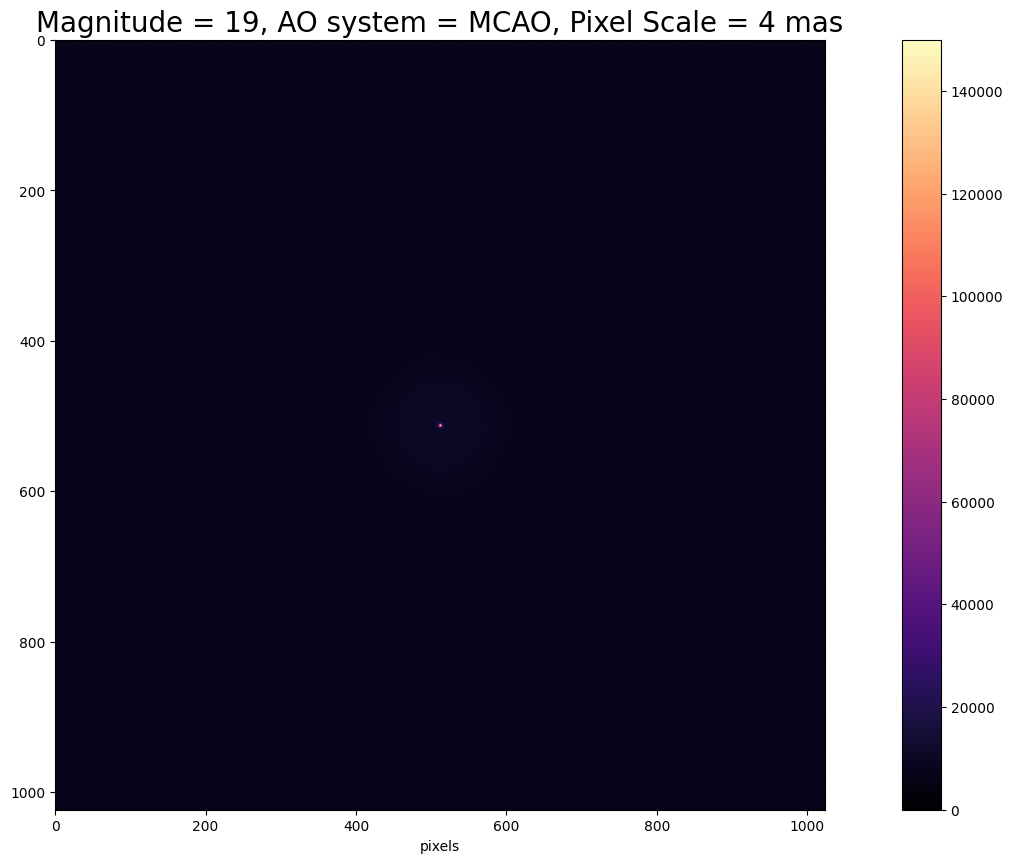

In [17]:
plot_img("point19_J_IMG_4mas_MCAO_et1000_fw1_J_fw2_open", title = "Magnitude = 19, AO system = MCAO, Pixel Scale = 4 mas")

In [13]:
filenames = ['point17_J_IMG_4mas_MCAO_et1000_fw1_J_fw2_open', 'point18_J_IMG_4mas_MCAO_et1000_fw1_J_fw2_open', 'point19_J_IMG_4mas_MCAO_et1000_fw1_J_fw2_open', 'point20_J_IMG_4mas_MCAO_et1000_fw1_J_fw2_open', 'point21_J_IMG_4mas_MCAO_et1000_fw1_J_fw2_open', 'point22_J_IMG_4mas_MCAO_et1000_fw1_J_fw2_open', 'point23_J_IMG_4mas_MCAO_et1000_fw1_J_fw2_open']
magnitudes = [17,18,19,20,21,22,23]
strehllist = []

for m in magnitudes:
    filenames.append(makeFits(amp=m,filt_cur="J",AOsystem="MCAO",fw1="J",fw2="open"))

for f in filenames:
    strehllist.append(strehl_ratio(file_discriminator=f,pixelscale=4,photofilter="J"))
    
print(strehllist)

 Image Plane effects: 100%|██████████| 1/1 [00:00<?, ?it/s]

astar.scopesim.detector.detector_array - Extracting from 1 detectors...



 Image Plane effects: 100%|██████████| 1/1 [00:00<?, ?it/s]

astar.scopesim.detector.detector_array - Extracting from 1 detectors...



 Image Plane effects: 100%|██████████| 1/1 [00:00<?, ?it/s]

astar.scopesim.detector.detector_array - Extracting from 1 detectors...



 Image Plane effects: 100%|██████████| 1/1 [00:00<?, ?it/s]

astar.scopesim.detector.detector_array - Extracting from 1 detectors...



 Image Plane effects: 100%|██████████| 1/1 [00:00<?, ?it/s]

astar.scopesim.detector.detector_array - Extracting from 1 detectors...



 Image Plane effects: 100%|██████████| 1/1 [00:00<?, ?it/s]

astar.scopesim.detector.detector_array - Extracting from 1 detectors...



 Image Plane effects: 100%|██████████| 1/1 [00:00<?, ?it/s]

astar.scopesim.detector.detector_array - Extracting from 1 detectors...



 Image Plane effects: 100%|██████████| 1/1 [00:00<?, ?it/s]

astar.scopesim.detector.detector_array - Extracting from 1 detectors...



 Image Plane effects: 100%|██████████| 1/1 [00:00<?, ?it/s]

astar.scopesim.detector.detector_array - Extracting from 1 detectors...



 Image Plane effects: 100%|██████████| 1/1 [00:00<?, ?it/s]

astar.scopesim.detector.detector_array - Extracting from 1 detectors...



 Image Plane effects: 100%|██████████| 1/1 [00:00<?, ?it/s]

astar.scopesim.detector.detector_array - Extracting from 1 detectors...



 Image Plane effects: 100%|██████████| 1/1 [00:00<?, ?it/s]

astar.scopesim.detector.detector_array - Extracting from 1 detectors...



 Image Plane effects: 100%|██████████| 1/1 [00:00<00:00, 992.73it/s]

astar.scopesim.detector.detector_array - Extracting from 1 detectors...



 Image Plane effects: 100%|██████████| 1/1 [00:00<?, ?it/s]

astar.scopesim.detector.detector_array - Extracting from 1 detectors...


[0.0009498724530030981, 0.002356629300695171, 0.005823968151406731, 0.012980183842048711, 0.02837581086143582, 0.035403763655054356, 0.037122583774970644, 0.0009498724530030981, 0.002356629300695171, 0.005823968151406731, 0.012980183842048711, 0.02837581086143582, 0.035403763655054356, 0.037122583774970644]


In [1]:
from scopesim_templates.misc import point_source
import scopesim as sim

#Necessary so ScopeSim knows where we put the packages we want to use:
local_package_folder = "../inst_pkgs"
sim.rc.__config__["!SIM.file.local_packages_path"] = local_package_folder

#Generate sources
nova1 = point_source(sed="sne/sn1a", amplitude=16, filter_curve="H", x = 0, y=0)
nova2 = point_source(sed="sne/sn1a", amplitude=17, filter_curve="H", x = 1, y=1.2)

source = nova1 + nova2

#Specify simulation conditions
cmds = sim.UserCommands(
            use_instrument="MICADO",
            set_modes=["SCAO","IMG_4mas"],  
            properties={
                "!OBS.dit": 1000,
            }
        )

#Run simulation
micado = sim.OpticalTrain(cmds)

micado.observe(source)

hdus = micado.readout(filename=f"testRun.fits")

 Image Plane effects: 100%|██████████| 1/1 [00:00<?, ?it/s]

astar.scopesim.detector.detector_array - Extracting from 1 detectors...


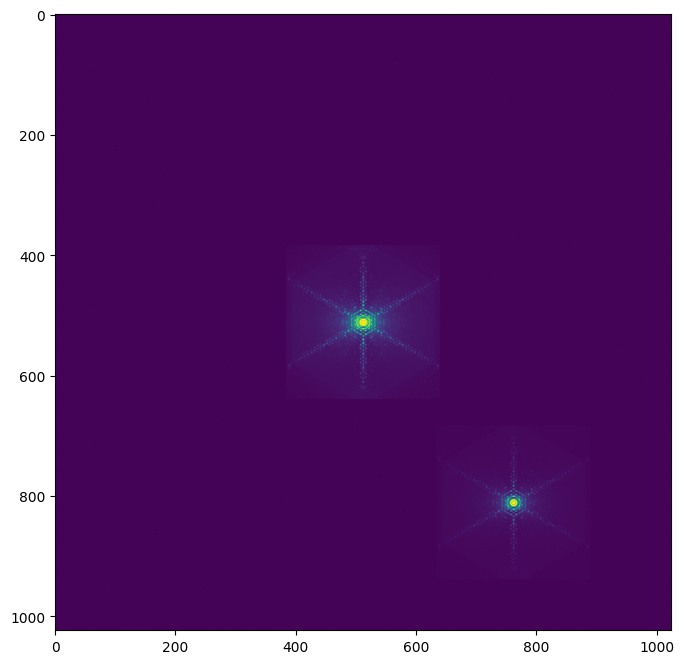

In [2]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,8))
plt.imshow(hdus[0][1].data)
plt.show()

 Image Plane effects: 100%|██████████| 1/1 [00:00<?, ?it/s]

astar.scopesim.detector.detector_array - Extracting from 1 detectors...


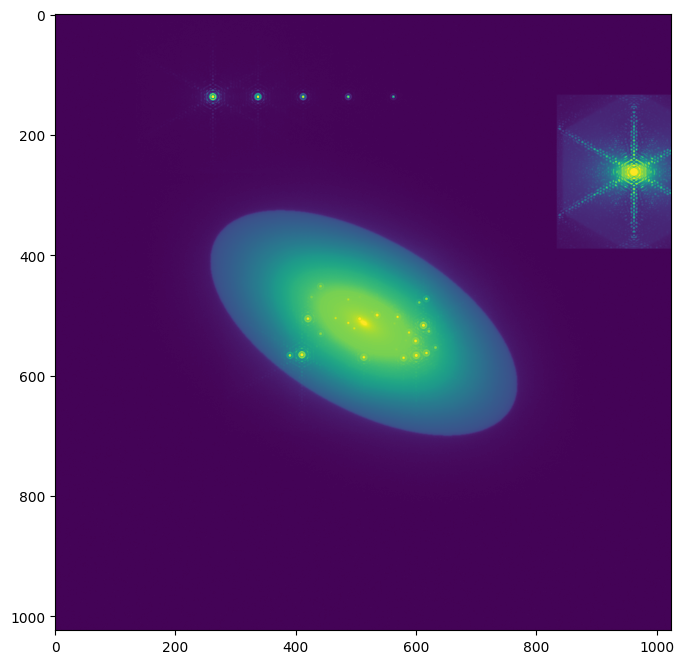

In [4]:
#import the necessary functions and packages
from scopesim_templates.stellar import star_field
from scopesim_templates.misc import point_source
import scopesim as sim
from scopesim_templates.extragalactic import elliptical
from scopesim_templates.stellar import stars
import matplotlib.pyplot as plt
from astropy.io import fits

#direct scopesim to the downloaded packages
local_package_folder = "../inst_pkgs" #use whatever path leads to inst_pkgs folder
sim.rc.__config__["!SIM.file.local_packages_path"] = local_package_folder

#generate multiple sources
starfield2 = star_field(n=30,mmin=17,mmax=22,width=1,height=.5,filter_name="Ks")
nova1 = point_source(sed="sne/sn1a", amplitude=15, filter_curve="Ks",   x = 1.8, y=-1)
galellip2 = elliptical(r_eff=3,pixel_scale=0.004,filter_name="Ks",amplitude=14)
starset2 = stars(filter_name="Ks",amplitudes=[17,18,19,20,21], spec_types="A0V", 
                 x=[-1,-.7,-.4,-.1,.2],y=[-1.5]*5)

#set the source to the sum of the generated sources
source = starfield2 + nova1 + galellip2 + starset2 

#Specify simulation conditions
cmds = sim.UserCommands(
            use_instrument="MICADO",
            set_modes=["SCAO","IMG_4mas"],  
            properties={"!OBS.dit": 1000,
            }
        )

#Run simulation
micado = sim.OpticalTrain(cmds)
micado.observe(source)
hdus = micado.readout(filename=f"combo.fits")

#plot the result
plt.figure(figsize=(8,8))
plt.imshow(hdus[0][1].data)
plt.show()

imf - sample_imf: Setting maximum allowed mass to 100000
imf - sample_imf: Loop 0 added 1.07e+05 Msun to previous total of 0.00e+00 Msun


 Image Plane effects: 100%|██████████| 1/1 [00:00<?, ?it/s]

astar.scopesim.detector.detector_array - Extracting from 1 detectors...


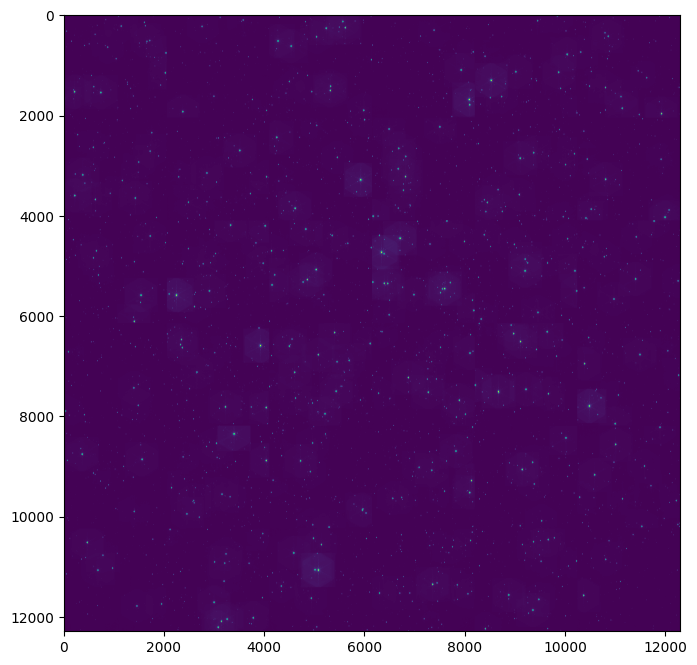

In [5]:
from scopesim_templates.stellar import cluster
import scopesim as sim
import matplotlib.pyplot as plt

#direct scopesim to the downloaded packages
local_package_folder = "../inst_pkgs" #use whatever path leads to inst_pkgs folder
sim.rc.__config__["!SIM.file.local_packages_path"] = local_package_folder

#generate source
cluster1 = cluster(mass=100000, distance=50000, core_radius=3, seed=68770)
source = cluster1

#Specify simulation conditions
cmds = sim.UserCommands(use_instrument="MICADO"
	, set_modes=["MCAO","IMG_1.5mas"]
	, properties={"!OBS.dit": 1000
		, "!DET.width": 12288 #the correct detector height and width for MICADO
		, "!DET.height": 12288 #default values of height and width are 1024
		, "!OBS.airmass": 1.3
		, "!OBS.filter_name_fw1": "open" #set one filter wheel to "open"
		, "!OBS.filter_name_fw2": "Ks" #the Ks filter is in filter wheel 2
		, "!ATMO.humidity" : .12 #relative humidity 
		, "!ATMO.temperature" : 8 #temperature in celsius 
        })

#Run simulation
micado = sim.OpticalTrain(cmds)
micado.observe(source)
hdus = micado.readout(filename=f"clusterKsMCAO.fits")

#plot the result
plt.figure(figsize=(8,8))
plt.imshow(hdus[0][1].data)
plt.show()

In [1]:
import scopesim as sim

local_package_folder = "../inst_pkgs"
sim.rc.__config__["!SIM.file.local_packages_path"] = local_package_folder

cmds = sim.UserCommands(use_instrument="MICADO")
print(list(cmds.list_modes()))

[('SCAO', 'SCAO optical system'), ('MCAO', 'MCAO optical system'), ('IMG_4mas', 'wide-field imager', '4mas/pix'), ('IMG_1.5mas', 'high resolution imager', '1.5mas/pix'), ('IMG_HCI', 'High contrast imaging'), ('SPEC_15000x20', 'spectrograph', 'slit size 15000x20mas'), ('SPEC_3000x48', 'spectrograph', 'slit size 3000x48mas'), ('SPEC_3000x16', 'spectrograph', 'slit size 3000x16mas'), ('SPEC_15000x50', 'spectrograph', 'slit size 15000x50mas', 'DEPRECATED'), ('SPEC_3000x50', 'spectrograph', 'slit size 3000x50mas', 'DEPRECATED'), ('SPEC_3000x20', 'spectrograph', 'slit size 3000x20mas', 'DEPRECATED')]


In [2]:
print(cmds)

CurrSys contents:
├─OBS: 
│ ├─instrument: MICADO
│ ├─modes: ['SCAO', 'IMG_4mas']
│ ├─airmass: 1.2
│ ├─declination: -30
│ ├─hour_angle: 0
│ ├─pupil_angle: 0
│ ├─dit: 60
│ ├─ndit: 1
│ ├─catg: SCIENCE
│ ├─tech: IMAGE
│ ├─type: OBJECT
│ ├─mjdobs: 2022-05-04T02:30:00
│ ├─tplstart: 2022-05-04T02:30:00
│ ├─tplexpno: 0
│ ├─tplno: 0
│ ├─obsname: MyScienceTest
│ ├─ra: 0.0
│ ├─dec: 0.0
│ ├─filter_name_fw1: open
│ ├─filter_name_fw2: Ks
│ └─filter_name_pupil: open
├─ATMO: 
│ ├─background: 
│ │ ├─filter_name: Ks
│ │ ├─value: 13.6
│ │ └─unit: mag
│ ├─spectrum: 
│ │ └─filename: TER_armazones_default_FULL_IMG.dat
│ ├─location: Armazones
│ ├─altitude: 3060
│ ├─longitude: -70.1918
│ ├─latitude: -24.5899
│ ├─temperature: 7
│ ├─humidity: 0.1
│ ├─pressure: 0.755
│ ├─pwv: 2.5
│ ├─airmass: !OBS.airmass
│ ├─pupil_angle: !OBS.pupil_angle
│ └─pixel_scale: !INST.pixel_scale
├─TEL: 
│ ├─ter_curve: 
│ │ └─filename: TER_ELT_5_mirror.dat
│ ├─telescope: ELT
│ └─temperature: !ATMO.temperature
├─INST: 
│ ├─temperature: 